In [1]:
import pandas as pd

In [2]:
with open('res.csv') as f0:
    with open('responses.csv', 'w') as f1:
        f1.write('id,ip,controller,item,element,label,square,element-type,element-name,parameter,value,event-time,none,situation,count,comment\n')
        for line in f0.readlines():
            if (line.count('Selector')) and (line.count(',') == 15):
                f1.write(line)

In [3]:
with open('res.csv') as f0:
    with open('age.csv', 'w') as f1:
        f1.write('id,age\n')
        for line in f0.readlines():
            if line.count('age,'):
                cropped = line[line.find('Final') + 6:]
                cropped = cropped[:cropped.find(',')]
                f1.write(line[:line.find(',')] + ',' + cropped + '\n')

In [4]:
with open('res.csv') as f0:
    with open('linguist.csv', 'w') as f1:
        f1.write('id,linguist\n')
        for line in f0.readlines():
            if line.count('linguist,'):
                cropped = line[line.find('Choice') + 7:]
                cropped = cropped[:cropped.find(',')]
                f1.write(line[:line.find(',')] + ',' + cropped + '\n')

In [5]:
res = pd.read_csv('responses.csv')
age = pd.read_csv('age.csv')
linguist = pd.read_csv('linguist.csv')

In [6]:
res = res.set_index('id').join(age.set_index('id')).join(linguist.set_index('id'))
res.head()

,ip,controller,item,element,label,square,element-type,element-name,parameter,value,event-time,none,situation,count,comment,age,linguist
id,,,,,,,,,,,,,,,,,
1703510943,01e4e560e10a506fc06f2549c1d0d37d,PennController,11,0,experiment,NaN,Selector,answer,Selection,sent_vs,1703510925433,undefined,moscow,0,sent_vs;sent_sv,1,да
1703510943,01e4e560e10a506fc06f2549c1d0d37d,PennController,12,0,experiment,NaN,Selector,answer,Selection,sent_vs,1703510926062,undefined,tigers,0,sent_vs;sent_sv,1,да
1703510943,01e4e560e10a506fc06f2549c1d0d37d,PennController,18,0,experiment,NaN,Selector,answer,Selection,sent_sv,1703510926585,undefined,wheels,0,sent_sv;sent_vs,1,да
1703510943,01e4e560e10a506fc06f2549c1d0d37d,PennController,3,0,experiment,NaN,Selector,answer,Selection,sent_sv,1703510927086,undefined,carriages,1,sent_sv;sent_vs,1,да
1703510943,01e4e560e10a506fc06f2549c1d0d37d,PennController,7,0,experiment,NaN,Selector,answer,Selection,sent_sv,1703510927573,undefined,horns,0,sent_sv;sent_vs,1,да


In [7]:
res = res[res.age >= 18]
res.shape

(720, 17)

In [8]:
target_parameters = ['bows','carriages','computers','buttons','lightbulbs','horns','baskets','castles','drawers']
target = res[res.situation.isin(target_parameters)]
target = target.replace({'sent_vs': 0, 'sent_sv': 1})

/tmp/ipykernel_113515/3573388885.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  target = target.replace({'sent_vs': 0, 'sent_sv': 1})


In [9]:
target.head()

,ip,controller,item,element,label,square,element-type,element-name,parameter,value,event-time,none,situation,count,comment,age,linguist
id,,,,,,,,,,,,,,,,,
1703514970,2ecb6ae22413454f01bdf5db98b4e6b4,PennController,7,0,experiment,NaN,Selector,answer,Selection,0,1703514657376,undefined,horns,2,sent_sv;sent_vs,19,да
1703514970,2ecb6ae22413454f01bdf5db98b4e6b4,PennController,8,0,experiment,NaN,Selector,answer,Selection,0,1703514679298,undefined,baskets,1,sent_vs;sent_sv,19,да
1703514970,2ecb6ae22413454f01bdf5db98b4e6b4,PennController,3,0,experiment,NaN,Selector,answer,Selection,0,1703514722416,undefined,carriages,0,sent_sv;sent_vs,19,да
1703514970,2ecb6ae22413454f01bdf5db98b4e6b4,PennController,6,0,experiment,NaN,Selector,answer,Selection,0,1703514756103,undefined,lightbulbs,0,sent_vs;sent_sv,19,да
1703514970,2ecb6ae22413454f01bdf5db98b4e6b4,PennController,2,0,experiment,NaN,Selector,answer,Selection,0,1703514766880,undefined,bows,1,sent_sv;sent_vs,19,да


In [10]:
import matplotlib.pyplot as plt

In [11]:
target.groupby(['situation', 'count'])['value'].count()

situation   count
baskets     0        14
            1        16
            2        10
bows        0        14
            1        16
            2        10
buttons     0        14
            1        16
            2        10
carriages   0        16
            1        10
            2        14
castles     0        16
            1        10
            2        14
computers   0        10
            1        14
            2        16
drawers     0        10
            1        14
            2        16
horns       0        10
            1        14
            2        16
lightbulbs  0        16
            1        10
            2        14
Name: value, dtype: int64

In [12]:
stat = target.groupby(['situation', 'count'])['value'].mean()

In [13]:
target = target[['situation', 'count', 'value']]
target.to_csv('data.csv')

In [14]:
legend = ['≤1', '1', '≥1']

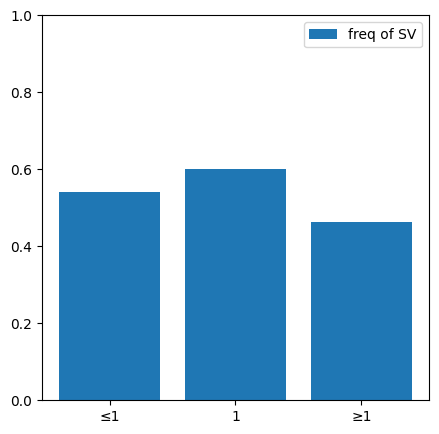

In [15]:
plt.figure(figsize=(5,5))
plt.bar(legend, stat.groupby('count').mean())
plt.ylim((0, 1))
plt.legend([r'freq of SV'])
plt.show()

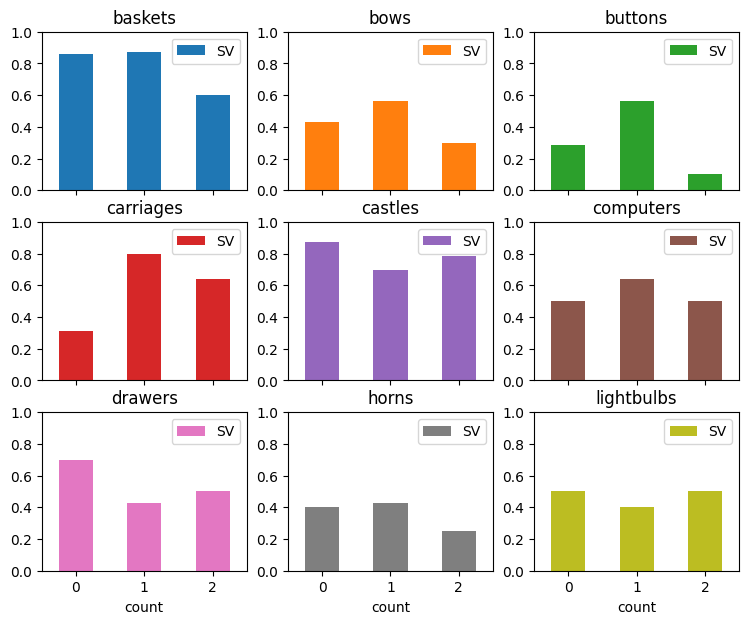

In [20]:
ax = stat.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(9, 7), layout=(3,3))
for axes in ax:
    for axis in axes:
        axis.set_ylim((0, 1))
        axis.legend(['SV'])
    

In [22]:
from scipy import stats

In [23]:
df_zero = target[target['count'] == 0]
df_one = target[target['count'] == 1]
df_two = target[target['count'] == 2]

### dumb plots

In [24]:
resps = target.groupby('id').first()

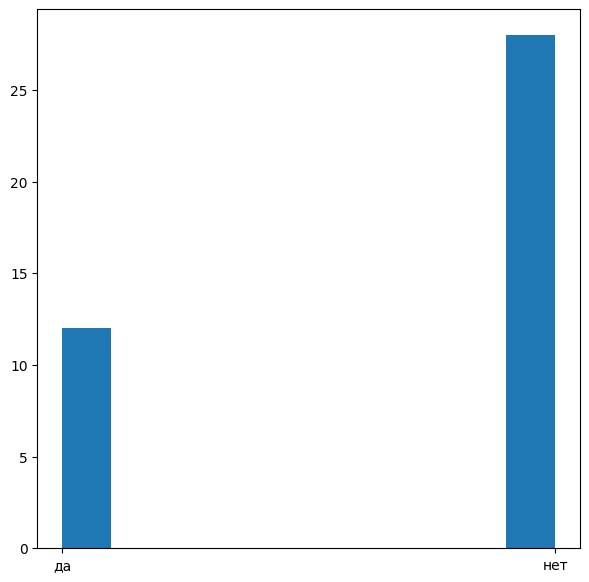

In [25]:
plt.figure(figsize=(7, 7))
plt.hist(resps.linguist)
plt.show()

### t test

In [26]:
stats.ttest_ind(df_zero['value'], df_one['value'], alternative='less')

TtestResult(statistic=np.float64(-0.9106740717564223), pvalue=np.float64(0.18169426102110714), df=np.float64(238.0))

In [27]:
stats.ttest_ind(df_two['value'], df_one['value'], alternative='less')

TtestResult(statistic=np.float64(-1.949227832839643), pvalue=np.float64(0.026221503200795356), df=np.float64(238.0))

In [28]:
stats.ttest_ind(df_two['value'], df_zero['value'], alternative='less')

TtestResult(statistic=np.float64(-1.0309202390160692), pvalue=np.float64(0.15181235797863943), df=np.float64(238.0))

### mixed effects logreg

In [36]:
from pymer4.models import Lmer

#### <=1

In [37]:
le_df = target[target['count'].isin([0, 1])]

In [48]:
le_model = Lmer("value ~ count + (1 | id) + (1 | situation)", data=le_df.reset_index(), family='binomial').fit()
print(le_model)

/home/retroflexivity/coding/expres-conditionals/.venv/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "event-time". Fall back to string conversion. The error is: integer 1703514679298 does not fit '32-bit int'
  warnings.warn('Error while trying to convert '


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: value~count+(1|id)+(1|situation)

Family: binomial	 Inference: parametric

Number of observations: 240	 Groups: {'id': 40.0, 'situation': 9.0}

Log-likelihood: -152.738 	 AIC: 313.476

Random effects:

                  Name    Var    Std
id         (Intercept)  1.258  1.121
situation  (Intercept)  0.573  0.757

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)     0.216  -0.520    0.951  0.375  1.240      0.595       2.588   
count           0.351  -0.246    0.949  0.305  1.421      0.782       2.582   

              Prob  Prob_2.5_ci  Prob_97.5_ci  Z-stat  P-val Sig  
(Intercept)  0.554        0.373         0.721   0.574  0.566      
count        0.587        0.439         0.721   1.152  0.249      


/home/retroflexivity/coding/expres-conditionals/.venv/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


#### >=1

In [40]:
ge_df = target[target['count'].isin([2, 1])].copy()
ge_df['count'] = ge_df['count'].replace(2, 0)

In [41]:
ge_model = Lmer("value ~ count + (1 | id) + (1 | situation)", data=ge_df.reset_index(), family='binomial').fit()
print(ge_model)

/home/retroflexivity/coding/expres-conditionals/.venv/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "event-time". Fall back to string conversion. The error is: integer 1703514657376 does not fit '32-bit int'
  warnings.warn('Error while trying to convert '


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: value~count+(1|id)+(1|situation)

Family: binomial	 Inference: parametric

Number of observations: 240	 Groups: {'id': 40.0, 'situation': 9.0}

Log-likelihood: -151.812 	 AIC: 311.624

Random effects:

                  Name    Var    Std
id         (Intercept)  1.539  1.241
situation  (Intercept)  0.633  0.796

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)    -0.134  -0.909    0.641  0.395  0.875      0.403       1.899   
count           0.741   0.124    1.357  0.315  2.097      1.132       3.886   

              Prob  Prob_2.5_ci  Prob_97.5_ci  Z-stat  P-val Sig  
(Intercept)  0.467        0.287         0.655  -0.338  0.735      
count        0.677        0.531         0.795   2.353  0.019   *  


/home/retroflexivity/coding/expres-conditionals/.venv/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


#### <>1

In [42]:
gl_df = target[target['count'].isin([2, 0])]

In [81]:
gl_model = Lmer("value ~ count + (1 | id) + (1 | situation)", data=gl_df.reset_index(), family='binomial').fit()
print(gl_model)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: value~count+(1|id)+(1|situation)

Family: binomial	 Inference: parametric

Number of observations: 240	 Groups: {'id': 40.0, 'situation': 9.0}

Log-likelihood: -154.172 	 AIC: 316.344

Random effects:

                  Name    Var    Std
id         (Intercept)  0.891  0.944
situation  (Intercept)  0.778  0.882

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)     0.210  -0.558    0.978  0.392  1.234      0.572       2.659   
count          -0.184  -0.480    0.112  0.151  0.832      0.619       1.119   

              Prob  Prob_2.5_ci  Prob_97.5_ci  Z-stat  P-val Sig  
(Intercept)  0.552        0.364         0.727   0.536  0.592      
count        0.454        0.382         0.528  -1.218  0.223      


/home/retroflexivity/coding/expres-conditionals/.venv/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "event-time". Fall back to string conversion. The error is: integer 1703514657376 does not fit '32-bit int'
  warnings.warn('Error while trying to convert '
/home/retroflexivity/coding/expres-conditionals/.venv/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


### contrast coding

In [49]:
import numpy as np
from pymer4.models import Lm

In [178]:
contrasts = lambda c: dict(zip(["0", "1", "2"], c))

In [87]:
model = Lmer("value ~ count + (1 | id) + (1 | situation)", data=target.reset_index(), family='binomial')

#### 'satisfied' baseline

$H_{0_0}: \mu_0 = \mu_1 = \mu_2 \iff \frac13\mu_0 + \frac13\mu_1 + \frac13\mu_2 = 0$

$H_{0_1}: \mu_2 = \mu_1 \iff \mu_2 - \mu_1 + 0\mu_0 = 0$

$H_{0_2}: \mu_0 = \mu_1 \iff \mu_0 - \mu_1 + 0\mu_2 = 0$

<!-- $H_{0_4}: \mu_0 = \mu_2 \iff \mu_0 - \mu_2 + 0\mu_1 = 0$ -->

In [236]:
hc = np.array([
    [1/3, 1/3, 1/3],
    [0, -1, 1],
    [1, -1, 0],
    # [-1, 0, 1]
])
hc

array([[ 0.33333333,  0.33333333,  0.33333333],
       [ 0.        , -1.        ,  1.        ],
       [ 1.        , -1.        ,  0.        ]])

In [237]:
xc = np.linalg.pinv(hc).round(5)
print('   h00      h01      h02      h03')
print(xc)

   h00      h01      h02      h03
[[ 1.      -0.33333  0.66667]
 [ 1.      -0.33333 -0.33333]
 [ 1.       0.66667 -0.33333]]


!max vs sat

In [248]:
print(model.fit(factors={"count": contrasts(xc.T[1])}))

/home/retroflexivity/coding/expres-conditionals/.venv/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "event-time". Fall back to string conversion. The error is: integer 1703514657376 does not fit '32-bit int'
  warnings.warn('Error while trying to convert '


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: value~count+(1|id)+(1|situation)

Family: binomial	 Inference: parametric

Number of observations: 360	 Groups: {'id': 40.0, 'situation': 9.0}

Log-likelihood: -224.122 	 AIC: 458.245

Random effects:

                  Name    Var    Std
id         (Intercept)  1.274  1.129
situation  (Intercept)  0.632  0.795

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)     0.216  -0.456    0.888  0.343  1.241      0.634       2.431   
count1         -0.352  -0.696   -0.008  0.175  0.703      0.499       0.992   
count2          0.271  -0.150    0.692  0.215  1.311      0.861       1.999   

              Prob  Prob_2.5_ci  Prob_97.5_ci  Z-stat  P-val Sig  
(Intercept)  0.554        0.388         0.709   0.629  0.529      
count1       0.413        0.333         0.498  -2.007  0.045   *  
count2       0.567        0.463         0.66

/home/retroflexivity/coding/expres-conditionals/.venv/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


!ex vs sat

In [247]:
print(model.fit(factors={"count": contrasts(xc.T[2])}))

/home/retroflexivity/coding/expres-conditionals/.venv/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "event-time". Fall back to string conversion. The error is: integer 1703514657376 does not fit '32-bit int'
  warnings.warn('Error while trying to convert '


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: value~count+(1|id)+(1|situation)

Family: binomial	 Inference: parametric

Number of observations: 360	 Groups: {'id': 40.0, 'situation': 9.0}

Log-likelihood: -224.122 	 AIC: 458.245

Random effects:

                  Name    Var    Std
id         (Intercept)  1.274  1.129
situation  (Intercept)  0.632  0.795

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE     OR  OR_2.5_ci  OR_97.5_ci  \
(Intercept)     0.216  -0.456    0.888  0.343  1.241      0.634       2.431   
count1         -0.016  -0.358    0.326  0.174  0.984      0.699       1.386   
count2         -0.509  -0.933   -0.085  0.216  0.601      0.394       0.918   

              Prob  Prob_2.5_ci  Prob_97.5_ci  Z-stat  P-val Sig  
(Intercept)  0.554        0.388         0.709   0.629  0.529      
count1       0.496        0.412         0.581  -0.090  0.928      
count2       0.375        0.282         0.47

/home/retroflexivity/coding/expres-conditionals/.venv/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
